In [3]:
pip install openpyxl

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import glob
import os

folder_path = "Dataset"

# Ambil semua file Excel di folder
excel_files = glob.glob(os.path.join(folder_path, "*-laporan_iklim_harian.xlsx"))

# Urutkan berdasarkan angka di depan nama file (misal 1-, 2-, 10-)
excel_files = sorted(
    excel_files,
    key=lambda x: int(os.path.basename(x).split('-')[0]),
    reverse=True
    # ambil angka sebelum tanda '-'
)

all_data = []

for file in excel_files:
    print(f"🔹 Sedang memproses: {file}")
    
    df = pd.read_excel(file)
    total_rows = len(df)
    
    rows_to_delete = list(range(0, 7)) + list(range(35, 54))
    rows_to_delete = [i for i in rows_to_delete if i < total_rows]
    
    df = df.drop(rows_to_delete).reset_index(drop=True)
    all_data.append(df)

# Gabungkan semua file jadi satu
final_df = pd.concat(all_data, ignore_index=True)

final_df.columns = [
    "TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", 
    "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"
]

output_path = os.path.join(folder_path, "gabungan_laporan_iklim.xlsx")
final_df.to_excel(output_path, index=False)

print("✅ Semua file sudah digabung urut sesuai bulan.")


🔹 Sedang memproses: Dataset\10-Sep-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\9-Okt-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\8-Aug-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\7-Jul-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\6-Jun-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\5-May-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\4-Apr-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\3-Mar-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\2-Feb-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\1-Jan-laporan_iklim_harian.xlsx
✅ Semua file sudah digabung urut sesuai bulan.


# Data Cleaning

In [5]:
import pandas as pd

df = pd.read_excel("Dataset/gabungan_laporan_iklim.xlsx")
print(df)


        TANGGAL    TN    TX  TAVG  RH_AVG    RR   SS  FF_X  DDD_X  FF_AVG  \
0    01-01-2025  26.4  32.4  29.1      75   0.0  5.6     5    290       2   
1    02-01-2025  27.0  33.0  29.2      75   0.0  2.5     7    300       1   
2    03-01-2025  25.0  32.0  28.5      76   0.0  6.9    13     31       2   
3    04-01-2025  26.6  34.6  30.1      65   0.0  2.4     4    260       1   
4    05-01-2025  26.0  34.2  28.7      78   0.0  2.1     4    250       1   
..          ...   ...   ...   ...     ...   ...  ...   ...    ...     ...   
274  23-10-2025  24.0  34.2  28.8      79  68.0  5.4     4    240       1   
275  24-10-2025  26.2  33.6  28.4      78   8.9  2.8     8    110       2   
276  25-10-2025  25.6  34.4  29.3      70   4.5  3.8     6    250       2   
277  26-10-2025  26.0  34.0  29.2      76   0.7  3.3     4    250       1   
278  27-10-2025  25.8  33.4  28.7      76   0.0  5.4     3    290       1   

    DDD_CAR  
0         W  
1         C  
2         C  
3         C  
4    

In [6]:
df.head(5)

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2025,26.4,32.4,29.1,75,0.0,5.6,5,290,2,W
1,02-01-2025,27.0,33.0,29.2,75,0.0,2.5,7,300,1,C
2,03-01-2025,25.0,32.0,28.5,76,0.0,6.9,13,31,2,C
3,04-01-2025,26.6,34.6,30.1,65,0.0,2.4,4,260,1,C
4,05-01-2025,26.0,34.2,28.7,78,0.0,2.1,4,250,1,C


In [7]:
df.describe()

,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,25.849104,32.613262,28.737993,76.810036,484.633692,4.036201,3.874552,238.254480,1.089606
std,0.987980,1.336081,0.937004,5.632298,2006.728819,2.596279,1.173155,90.919621,0.459746
min,23.600000,28.400000,25.700000,63.000000,0.000000,0.000000,2.000000,10.000000,0.000000
25%,25.000000,32.000000,28.200000,74.000000,0.000000,1.800000,3.000000,215.000000,1.000000
50%,26.000000,32.600000,28.800000,77.000000,0.400000,4.000000,4.000000,280.000000,1.000000
75%,26.600000,33.400000,29.300000,80.000000,8.400000,6.500000,4.000000,300.000000,1.000000
max,28.000000,35.800000,31.400000,92.000000,8888.000000,8.000000,13.000000,360.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  279 non-null    object 
 1   TN       279 non-null    float64
 2   TX       279 non-null    float64
 3   TAVG     279 non-null    float64
 4   RH_AVG   279 non-null    int64  
 5   RR       279 non-null    float64
 6   SS       279 non-null    float64
 7   FF_X     279 non-null    int64  
 8   DDD_X    279 non-null    int64  
 9   FF_AVG   279 non-null    int64  
 10  DDD_CAR  279 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 24.1+ KB


In [9]:
df.isna().sum()

TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64

In [10]:
# Data mapping for DDR_CAR

mapping = {
    'C': 0, #Calm
    'N': 0, #North
    'NE': 45, #North East
    'E': 90, #East
    'SE': 135, #South East 
    'S': 180, #South
    'SW': 225, #South West 
    'W': 270, #West 
    'NW': 315 #North West
}

df['DDD_CAR'] = df['DDD_CAR'].map(mapping)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
#Check how many rows in column RR has 8888 value


check8888 = (df == 8888).sum().sum()
print("8888 count in any column ", check8888)

check9999 = (df == 9999).sum().sum()
print("9999 count in any column ", check9999)



8888 count in any column  15
9999 count in any column  0


In [14]:
# Fill 8888 values in any colomn

import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#We replace 8888 to nan 
df.replace(8888, np.nan, inplace=True)

#We select all of the column that has nan value
num_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS','FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR'] 

#InterativeImputer 

imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ),
    random_state=42,
    max_iter=10
)

# Begin the imputer
df[num_cols] = imputer.fit_transform(df[num_cols])


In [15]:
check888after = (df == 8888).sum().sum()
print(check888after)

0


# EDA 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TANGGAL  279 non-null    object 
 1   TN       279 non-null    float64
 2   TX       279 non-null    float64
 3   TAVG     279 non-null    float64
 4   RH_AVG   279 non-null    float64
 5   RR       279 non-null    float64
 6   SS       279 non-null    float64
 7   FF_X     279 non-null    float64
 8   DDD_X    279 non-null    float64
 9   FF_AVG   279 non-null    float64
 10  DDD_CAR  279 non-null    float64
dtypes: float64(10), object(1)
memory usage: 24.1+ KB


In [21]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation =numeric_df.corrwith(df['RR'])
print(correlation)

TN        -0.465346
TX        -0.220081
TAVG      -0.414082
RH_AVG     0.397483
RR         1.000000
SS        -0.149334
FF_X      -0.038236
DDD_X      0.032136
FF_AVG    -0.089194
DDD_CAR   -0.078834
dtype: float64


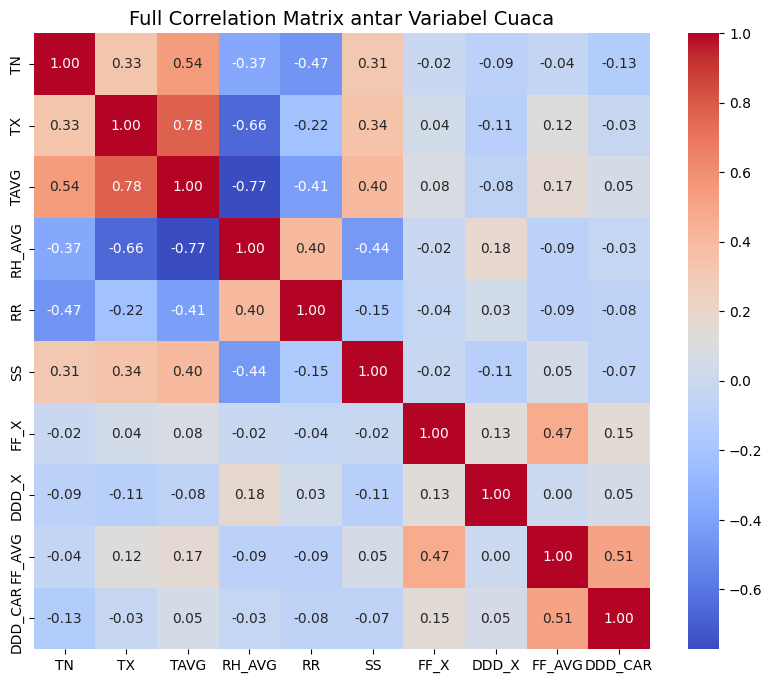

In [32]:
# Pastikan kolom tanggal tidak ikut
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Buat matrix korelasi penuh
corr_matrix = numeric_df.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Full Correlation Matrix antar Variabel Cuaca', fontsize=14)
plt.show()